In [60]:
#https://www.kaggle.com/datasets/ayessa/salary-prediction-classification

import sklearn
import numpy as np
import scipy as sp
import pandas as pd

In [61]:
df_salary = pd.read_csv('salary.csv')
df_salary.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [62]:
df_salary.shape

(32561, 15)

In [63]:
df_salary.drop(['fnlwgt','education-num'],axis='columns',inplace=True)
df_salary.head()

,age,workclass,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [64]:
df_salary = df_salary.dropna()

In [65]:
df_salary[df_salary.isnull().any(axis=1)].count()

age               0
workclass         0
education         0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64

In [66]:
df_salary.shape

(32561, 13)

# VISUALIZING

In [67]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Salary')

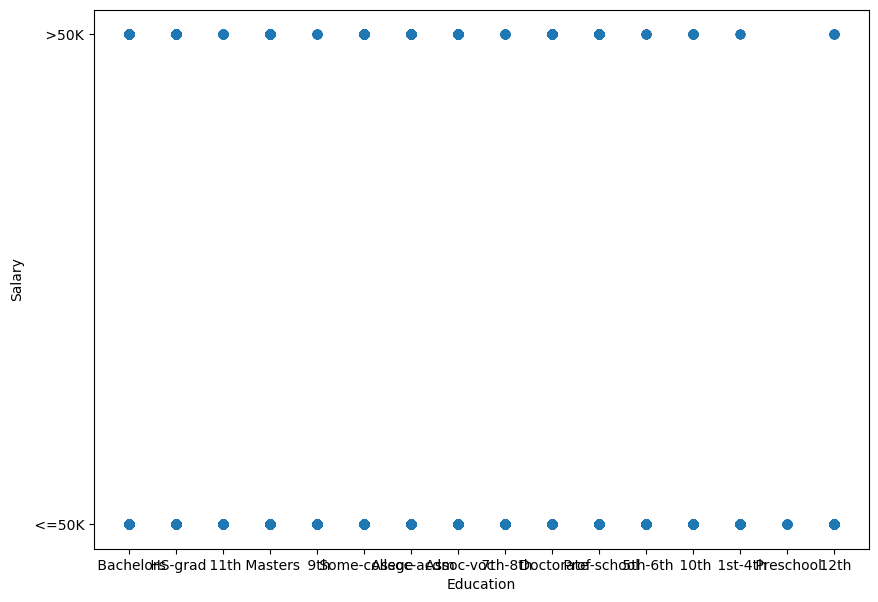

In [68]:
fig, ax = plt.subplots(figsize=(10, 7))
plt.scatter(df_salary['education'],df_salary['salary'])
plt.xlabel('Education')
plt.ylabel('Salary')

Text(0, 0.5, 'Salary')

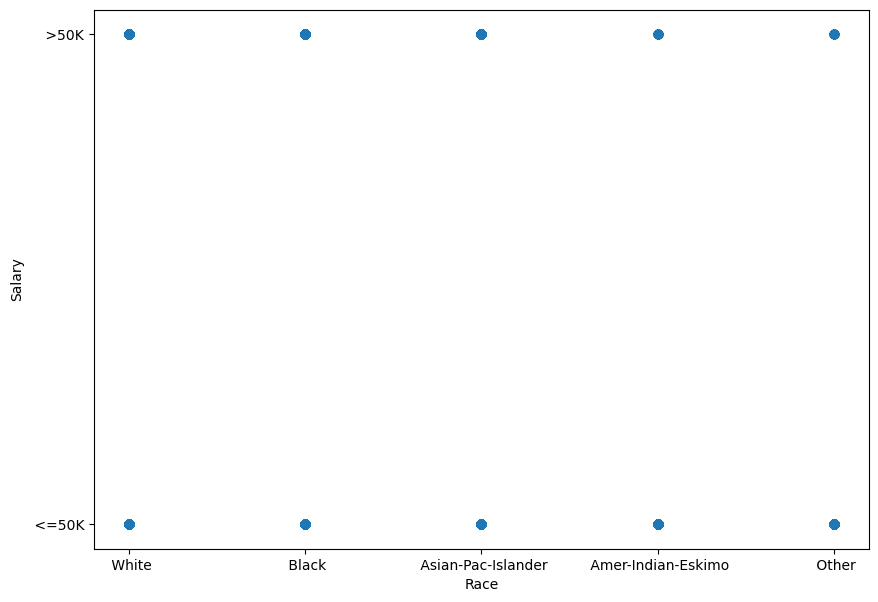

In [69]:
fig, ax = plt.subplots(figsize=(10, 7))
plt.scatter(df_salary['race'],df_salary['salary'])
plt.xlabel('Race')
plt.ylabel('Salary')

In [70]:
pd.crosstab(df_salary['education'],df_salary['salary'])

salary,<=50K,>50K
education,,
10th,871,62
11th,1115,60
12th,400,33
1st-4th,162,6
5th-6th,317,16
7th-8th,606,40
9th,487,27
Assoc-acdm,802,265
Assoc-voc,1021,361


In [71]:
pd.crosstab(df_salary['age'],df_salary['salary'])

salary,<=50K,>50K
age,,
17,395,0
18,550,0
19,710,2
20,753,0
21,717,3
...,...,...
85,3,0
86,1,0
87,1,0


In [72]:
from sklearn import preprocessing
label_encoding = preprocessing.LabelEncoder()

df_salary = pd.get_dummies(df_salary,columns=['workclass'])
df_salary = pd.get_dummies(df_salary,columns=['education'])
df_salary = pd.get_dummies(df_salary,columns=['marital-status'])
df_salary = pd.get_dummies(df_salary,columns=['occupation'])
df_salary = pd.get_dummies(df_salary,columns=['relationship'])
df_salary = pd.get_dummies(df_salary,columns=['race'])
df_salary = pd.get_dummies(df_salary,columns=['native-country'])
df_salary['sex'] = label_encoding.fit_transform(df_salary['sex'].astype(str))
df_salary['salary'] = label_encoding.fit_transform(df_salary['salary'].astype(str))

df_salary.to_csv('salary_processed.csv',index=False)
df_salary.head(15)

,age,sex,capital-gain,capital-loss,hours-per-week,salary,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,39,1,2174,0,40,0,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,50,1,0,0,13,0,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,38,1,0,0,40,0,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,53,1,0,0,40,0,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,28,0,0,0,40,0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,37,0,0,0,40,0,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
6,49,0,0,0,16,0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,52,1,0,0,45,1,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
8,31,0,14084,0,50,1,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
9,42,1,5178,0,40,1,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [73]:
df_salary_corr = df_salary.corr()
df_salary_corr.head(106)

# 0~ -> pas de relation
# -1~ -> relation négation
# +1~ -> strong relation

,age,sex,capital-gain,capital-loss,hours-per-week,salary,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
age,1.000000,0.088832,0.077674,5.777454e-02,0.068756,0.234037,0.042627,0.051227,0.060901,-0.019362,...,0.004242,0.008374,0.002583,0.000613,-0.013816,-0.006271,0.004843,0.015917,-1.505357e-02,0.000375
sex,0.088832,1.000000,0.048480,4.556735e-02,0.229309,0.215980,-0.065556,0.000989,-0.037966,0.001405,...,0.000464,-0.015791,-0.003504,-0.004663,0.003088,-0.014012,-0.012744,-0.006993,-1.205333e-03,0.006753
capital-gain,0.077674,0.048480,1.000000,-3.161506e-02,0.078409,0.223329,-0.015585,-0.005768,-0.007007,-0.002140,...,-0.003879,-0.006103,-0.001680,0.005323,0.005735,-0.003432,-0.003526,0.004599,-2.564276e-03,-0.002193
capital-loss,0.057775,0.045567,-0.031615,1.000000e+00,0.054256,0.150526,-0.016102,0.010798,0.014668,-0.003177,...,-0.007308,-0.004718,-0.004160,0.010114,0.006637,-0.005095,0.008102,0.008784,-5.997599e-07,-0.004804
hours-per-week,0.068756,0.229309,0.078409,5.425636e-02,1.000000,0.229689,-0.168640,0.013293,0.011576,-0.014262,...,0.003973,-0.008964,0.001264,0.007938,-0.004988,0.009537,-0.006006,0.002446,-1.137917e-02,0.007408
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
native-country_ Thailand,-0.006271,-0.014012,-0.003432,-5.095482e-03,0.009537,-0.004078,-0.000085,-0.004099,-0.006164,-0.000345,...,-0.000793,-0.001394,-0.000452,-0.001167,-0.000932,1.000000,-0.000568,-0.068978,-1.067931e-03,-0.000521
native-country_ Trinadad&Tobago,0.004843,-0.012744,-0.003526,8.102329e-03,-0.006006,-0.007660,-0.000393,-0.004212,-0.001148,-0.000354,...,-0.000815,-0.001432,-0.000464,-0.001199,-0.000957,-0.000568,1.000000,-0.070869,-1.097212e-03,-0.000536
native-country_ United-States,0.015917,-0.006993,0.004599,8.783567e-03,0.002446,0.034470,0.006193,0.015441,0.033196,0.005000,...,-0.098924,-0.173848,-0.056315,-0.145558,-0.116167,-0.068978,-0.070869,1.000000,-1.331803e-01,-0.065031
native-country_ Vietnam,-0.015054,-0.001205,-0.002564,-5.997599e-07,-0.011379,-0.017649,-0.002286,0.000099,-0.003611,-0.000666,...,-0.001532,-0.002692,-0.000872,-0.002254,-0.001799,-0.001068,-0.001097,-0.133180,1.000000e+00,-0.001007


In [74]:
import seaborn as sns

<Axes: >

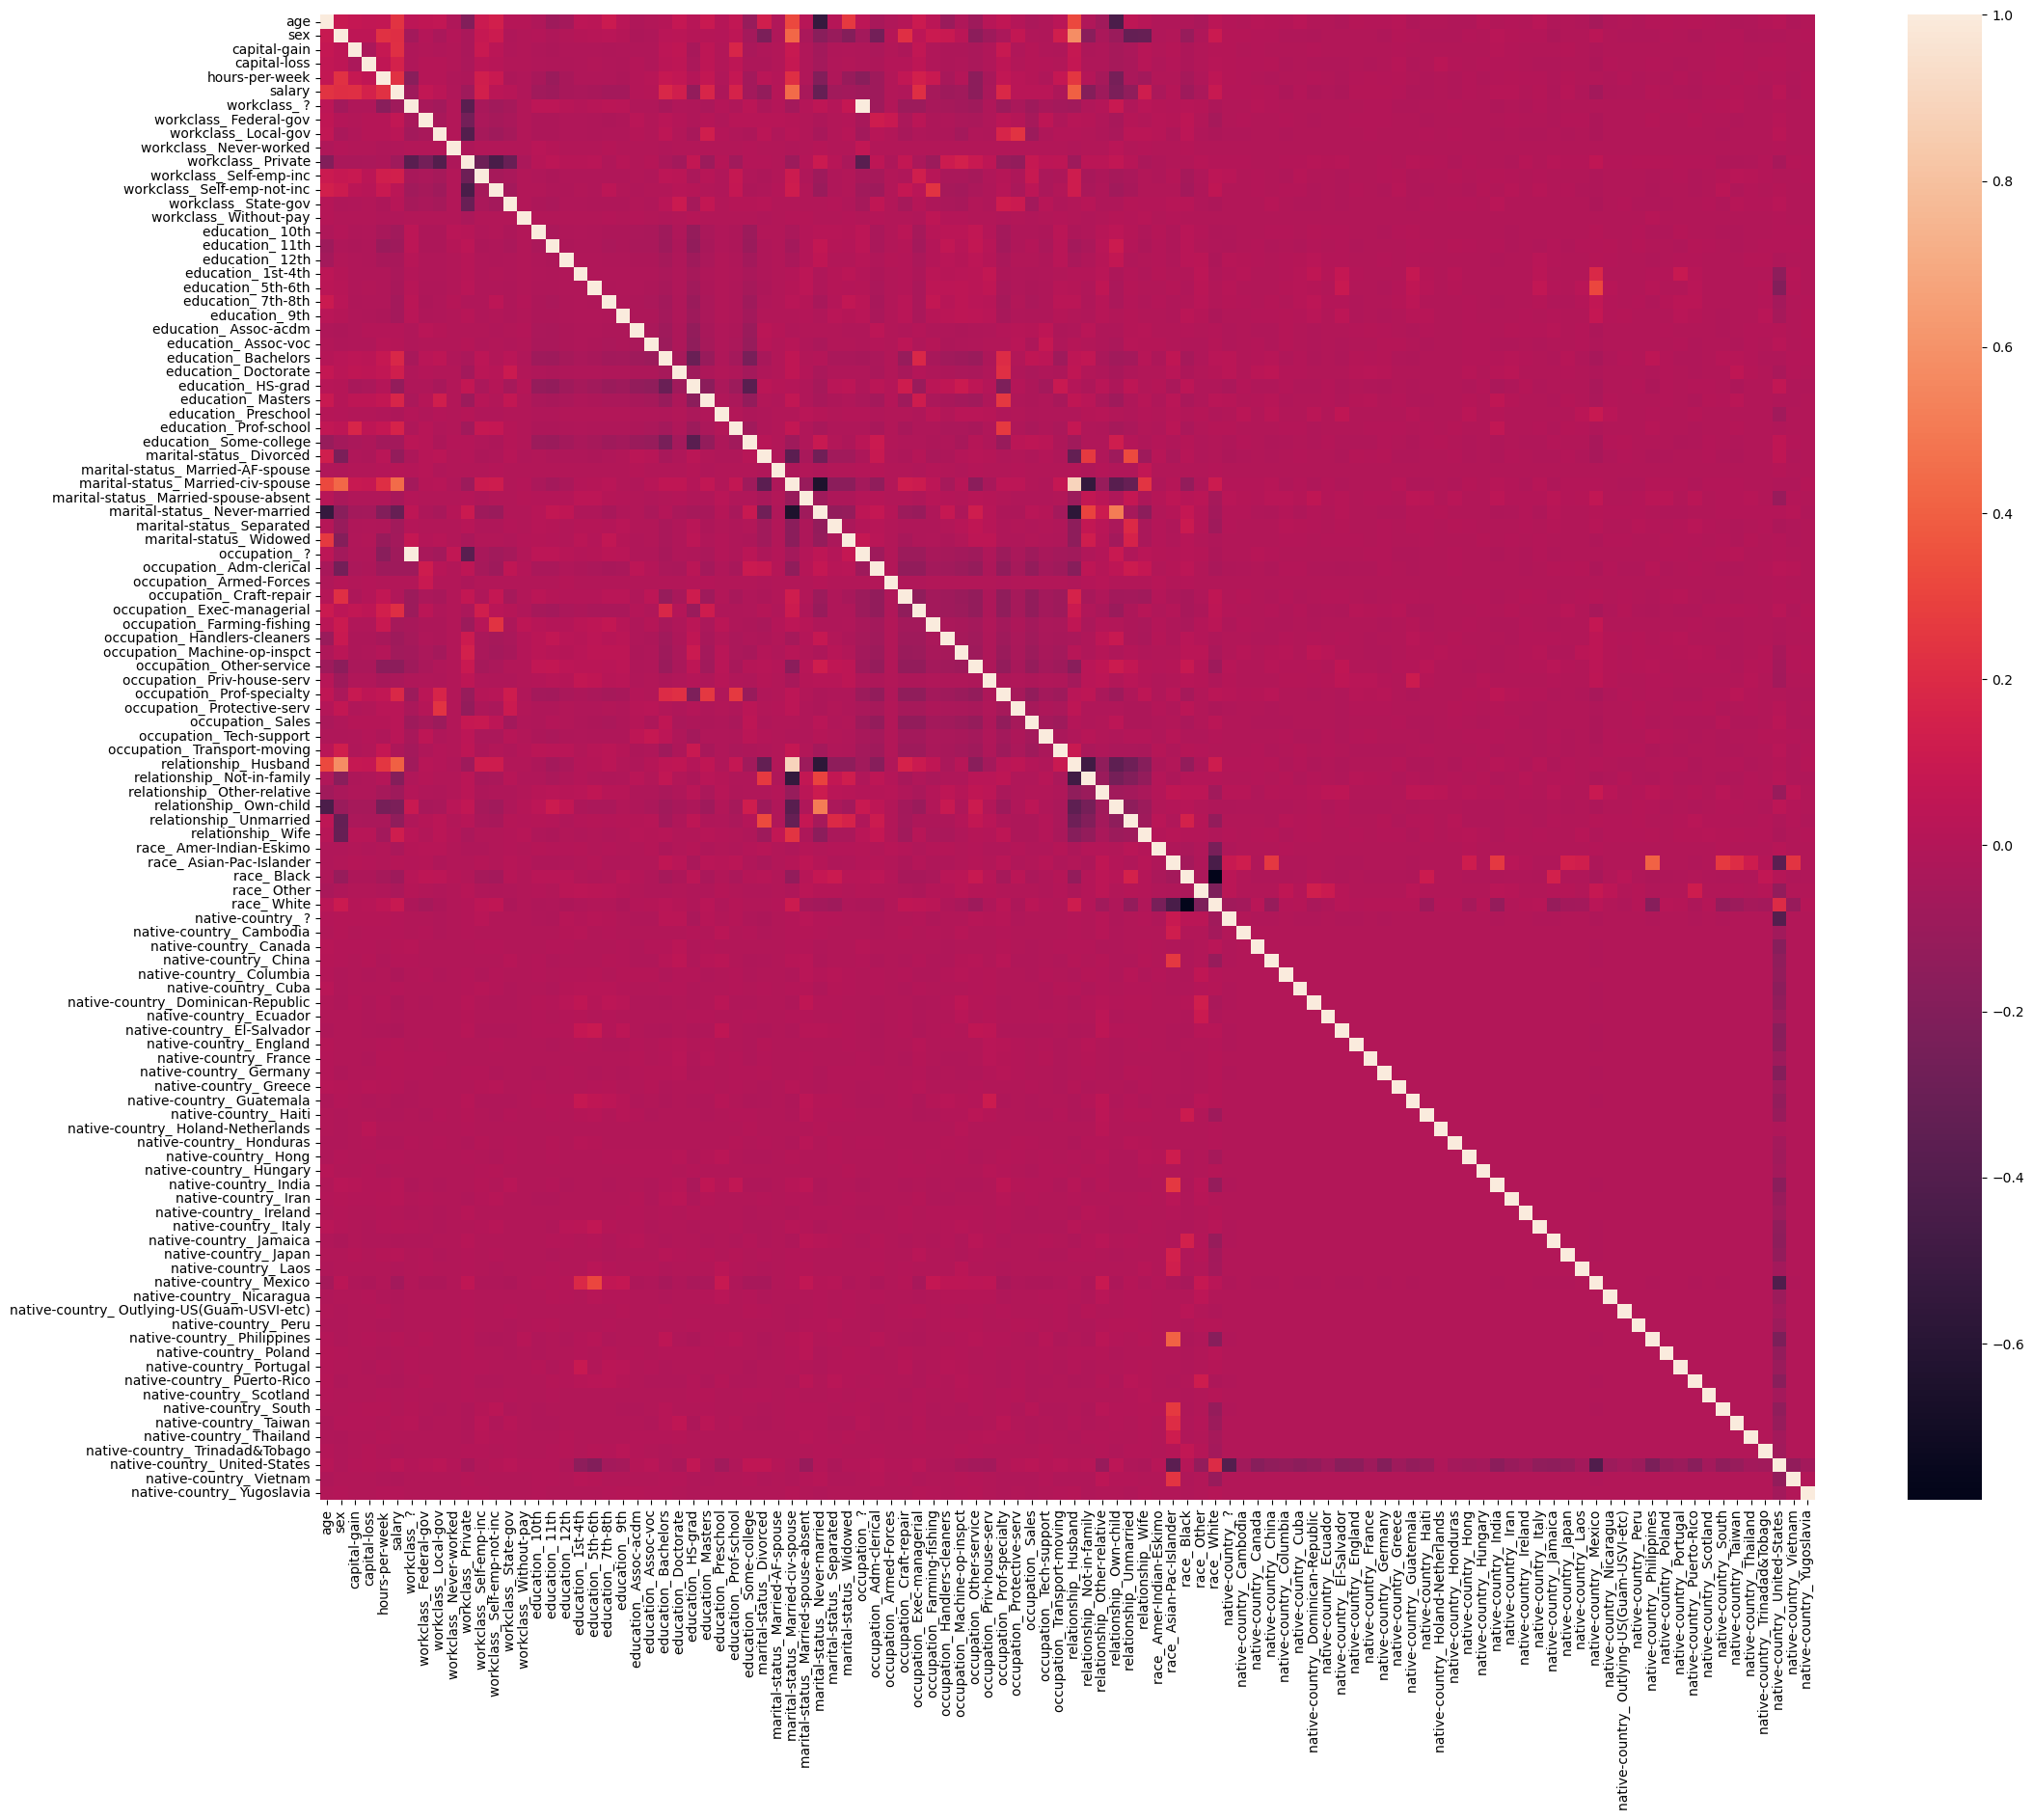

In [75]:
fig, ax = plt.subplots(figsize=(25, 20))
sns.heatmap(df_salary_corr, annot=False)

# Classification

In [76]:
df_salary = pd.read_csv('salary_processed.csv')
df_salary.head()

,age,sex,capital-gain,capital-loss,hours-per-week,salary,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,39,1,2174,0,40,0,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,50,1,0,0,13,0,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,38,1,0,0,40,0,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,53,1,0,0,40,0,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,28,0,0,0,40,0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [77]:
from sklearn.model_selection import train_test_split

In [78]:
X = df_salary.drop('salary', axis=1)
Y = df_salary['salary']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

In [79]:
x_train.shape, y_train.shape

((26048, 105), (26048,))

In [80]:
x_test.shape, y_test.shape

((6513, 105), (6513,))

## Models

In [81]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

In [82]:
FEATURES = list(df_salary.columns[:-1])
FEATURES

['age',
 'sex',
 'capital-gain',
 'capital-loss',
 'hours-per-week',
 'salary',
 'workclass_ ?',
 'workclass_ Federal-gov',
 'workclass_ Local-gov',
 'workclass_ Never-worked',
 'workclass_ Private',
 'workclass_ Self-emp-inc',
 'workclass_ Self-emp-not-inc',
 'workclass_ State-gov',
 'workclass_ Without-pay',
 'education_ 10th',
 'education_ 11th',
 'education_ 12th',
 'education_ 1st-4th',
 'education_ 5th-6th',
 'education_ 7th-8th',
 'education_ 9th',
 'education_ Assoc-acdm',
 'education_ Assoc-voc',
 'education_ Bachelors',
 'education_ Doctorate',
 'education_ HS-grad',
 'education_ Masters',
 'education_ Preschool',
 'education_ Prof-school',
 'education_ Some-college',
 'marital-status_ Divorced',
 'marital-status_ Married-AF-spouse',
 'marital-status_ Married-civ-spouse',
 'marital-status_ Married-spouse-absent',
 'marital-status_ Never-married',
 'marital-status_ Separated',
 'marital-status_ Widowed',
 'occupation_ ?',
 'occupation_ Adm-clerical',
 'occupation_ Armed-Forces

In [83]:
result_dict = {}

## LogisticRegression

In [84]:
alg = LogisticRegression(penalty='l1', C=100.0, solver='liblinear')
logistic_model = alg.fit(x_train, y_train)
y_pred = logistic_model.predict(x_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print("accuracy_score : ", acc)
print("precision_score : ", prec)
print("recall_score : ", recall)

accuracy_score :  0.85014586212191
precision_score :  0.6940015186028854
recall_score :  0.6146603900470746


## DecisionTree

In [85]:
alg = DecisionTreeClassifier(max_depth=None, max_features=None)
decision_model = alg.fit(x_train, y_train)
y_pred = decision_model.predict(x_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print("accuracy_score : ", acc)
print("precision_score : ", prec)
print("recall_score : ", recall)

accuracy_score :  0.8257331490864425
precision_score :  0.6189189189189189
recall_score :  0.6160053799596503


## NaiveBayes

In [86]:
alg = GaussianNB(priors=None)
naive_model = alg.fit(x_train, y_train)
y_pred = naive_model.predict(x_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print("accuracy_score : ", acc)
print("precision_score : ", prec)
print("recall_score : ", recall)

accuracy_score :  0.7878089973898357
precision_score :  0.5226000860955661
recall_score :  0.816408876933423


# Hyperparameter Tuning With GridSearch

In [87]:
from sklearn.model_selection import GridSearchCV

## DecisionTree

In [88]:
#hyperparameters
max_depth_values = [2, 4, 5, 7, 9, 10, 25]
parameters = {'max_depth': max_depth_values}

grid_search = GridSearchCV(DecisionTreeClassifier(), parameters, cv=3, return_train_score=True)
grid_search.fit(x_train, y_train)

for i in range(len(max_depth_values)):
    print('Parameters: ', grid_search.cv_results_['params'][i])
    print('Mean Test Score: ', grid_search.cv_results_['mean_test_score'][i])
    print('Rank: ', grid_search.cv_results_['rank_test_score'][i])

print('\nBest:')
grid_search.best_params_

Parameters:  {'max_depth': 2}
Mean Test Score:  0.8019809370126431
Rank:  7
Parameters:  {'max_depth': 4}
Mean Test Score:  0.8345744776764298
Rank:  5
Parameters:  {'max_depth': 5}
Mean Test Score:  0.8440570894738461
Rank:  4
Parameters:  {'max_depth': 7}
Mean Test Score:  0.8531172388959622
Rank:  3
Parameters:  {'max_depth': 9}
Mean Test Score:  0.8533859145845041
Rank:  2
Parameters:  {'max_depth': 10}
Mean Test Score:  0.8540770482266472
Rank:  1
Parameters:  {'max_depth': 25}
Mean Test Score:  0.8221744554936509
Rank:  6

Best:


{'max_depth': 10}

In [89]:
#fit a DecisionTree model using the best parameters
best_decision_tree_model = DecisionTreeClassifier(
    max_depth = grid_search.best_params_['max_depth']).fit(x_train, y_train)

#make predictions on the test set
y_pred = best_decision_tree_model.predict(x_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print("accuracy_score : ", acc)
print("precision_score : ", prec)
print("recall_score : ", recall)

accuracy_score :  0.8601259020420697
precision_score :  0.7376237623762376
recall_score :  0.6012104909213181


## LogisticRegression

In [90]:
C_values = [0.1, 0.4, 0.8, 1, 2, 5, 10]
penalty_values = ['l1','l2']
parameters = {'C': C_values, 'penalty': penalty_values}

grid_search = GridSearchCV(LogisticRegression(solver='liblinear', max_iter=2000), parameters, cv=3, return_train_score=True)
grid_search.fit(x_train, y_train.values.ravel())

for i in range(len(C_values) * len(penalty_values)):
    print('Parameters: ', grid_search.cv_results_['params'][i])
    print('Mean Test Score: ', grid_search.cv_results_['mean_test_score'][i])
    print('Rank: ', grid_search.cv_results_['rank_test_score'][i])

print('\nBest:')
grid_search.best_params_

Parameters:  {'C': 0.1, 'penalty': 'l1'}
Mean Test Score:  0.8504683273311867
Rank:  12
Parameters:  {'C': 0.1, 'penalty': 'l2'}
Mean Test Score:  0.8506986492037152
Rank:  8
Parameters:  {'C': 0.4, 'penalty': 'l1'}
Mean Test Score:  0.8512745091562728
Rank:  6
Parameters:  {'C': 0.4, 'penalty': 'l2'}
Mean Test Score:  0.850852210383831
Rank:  7
Parameters:  {'C': 0.8, 'penalty': 'l1'}
Mean Test Score:  0.8514280703363885
Rank:  3
Parameters:  {'C': 0.8, 'penalty': 'l2'}
Mean Test Score:  0.850621861981109
Rank:  9
Parameters:  {'C': 1, 'penalty': 'l1'}
Mean Test Score:  0.8515816226731063
Rank:  2
Parameters:  {'C': 1, 'penalty': 'l2'}
Mean Test Score:  0.8505450747585029
Rank:  10
Parameters:  {'C': 2, 'penalty': 'l1'}
Mean Test Score:  0.8516967813985213
Rank:  1
Parameters:  {'C': 2, 'penalty': 'l2'}
Mean Test Score:  0.8505066855688987
Rank:  11
Parameters:  {'C': 5, 'penalty': 'l1'}
Mean Test Score:  0.8514280438061951
Rank:  4
Parameters:  {'C': 5, 'penalty': 'l2'}
Mean Test Sco

{'C': 2, 'penalty': 'l1'}

In [91]:
best_logisticregression_model = LogisticRegression(
    C = grid_search.best_params_['C'], penalty=grid_search.best_params_['penalty'], solver='liblinear', max_iter=1000, tol=1e-3, dual=False).fit(x_train, y_train)

y_pred = best_logisticregression_model.predict(x_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print("accuracy_score : ", acc)
print("precision_score : ", prec)
print("recall_score : ", recall)

accuracy_score :  0.8513741747274681
precision_score :  0.6973384030418252
recall_score :  0.6166778749159382


## NaiveBayes

In [92]:
#no hyperparameters
param_grid = {}

grid_search_nb = GridSearchCV(GaussianNB(), param_grid=param_grid, cv=3, return_train_score=True)
grid_search_nb.fit(x_train, y_train)


print('\nBest:')
grid_search_nb.best_params_


Best:


{}

In [93]:
best_naive_bayes_model = grid_search_nb.best_estimator_

y_pred = best_naive_bayes_model.predict(x_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print("accuracy_score : ", acc)
print("precision_score : ", prec)
print("recall_score : ", recall)

accuracy_score :  0.7878089973898357
precision_score :  0.5226000860955661
recall_score :  0.816408876933423


# Deep Learning

In [94]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
tf.keras.backend.clear_session()

In [95]:
df_salary.head().T

,0,1,2,3,4
age,39,50,38,53,28
sex,1,1,1,1,0
capital-gain,2174,0,0,0,0
capital-loss,0,0,0,0,0
hours-per-week,40,13,40,40,40
...,...,...,...,...,...
native-country_ Thailand,False,False,False,False,False
native-country_ Trinadad&Tobago,False,False,False,False,False
native-country_ United-States,True,True,True,True,False
native-country_ Vietnam,False,False,False,False,False


In [96]:
df_salary = df_salary.sample(frac=1).reset_index(drop=True)
df_salary.head().T

,0,1,2,3,4
age,45,32,47,32,59
sex,1,0,1,0,1
capital-gain,0,0,0,0,0
capital-loss,0,0,0,0,0
hours-per-week,44,50,40,40,40
...,...,...,...,...,...
native-country_ Thailand,False,False,False,False,False
native-country_ Trinadad&Tobago,False,False,False,False,False
native-country_ United-States,True,True,True,True,True
native-country_ Vietnam,False,False,False,False,False


In [97]:
features = df_salary.drop('salary',axis=1)
target = df_salary[['salary']]

In [98]:
standardScaler = StandardScaler() #(x-mean(x))/std(x)
scaled_features = pd.DataFrame(standardScaler.fit_transform(features), 
                               columns=features.columns,
                               index=features.index)
scaled_features.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32561.0,-2.749559e-17,1.000015,-1.582206,-0.775768,-0.115955,0.690484,3.769612
sex,32561.0,-8.117745e-17,1.000015,-1.422331,-1.422331,0.703071,0.703071,0.703071
capital-gain,32561.0,1.352958e-17,1.000015,-0.145920,-0.145920,-0.145920,-0.145920,13.394578
capital-loss,32561.0,-4.669886e-17,1.000015,-0.216660,-0.216660,-0.216660,-0.216660,10.593507
hours-per-week,32561.0,-1.702108e-17,1.000015,-3.194030,-0.035429,-0.035429,0.369519,4.742967
...,...,...,...,...,...,...,...,...
native-country_ Thailand,32561.0,2.836846e-18,1.000015,-0.023518,-0.023518,-0.023518,-0.023518,42.519930
native-country_ Trinadad&Tobago,32561.0,-8.728758e-18,1.000015,-0.024163,-0.024163,-0.024163,-0.024163,41.385225
native-country_ United-States,32561.0,1.396601e-16,1.000015,-2.932948,0.340954,0.340954,0.340954,0.340954
native-country_ Vietnam,32561.0,2.531340e-17,1.000015,-0.045408,-0.045408,-0.045408,-0.045408,22.022377


## Splitting dataset into training, testing

In [99]:
x_train, x_test, y_train, y_test = train_test_split(scaled_features, 
                                                    target, 
                                                    test_size=0.2, #20%
                                                    random_state=10)

In [100]:
x_train.shape, x_test.shape

((26048, 105), (6513, 105))

In [101]:
x_train, x_val, y_train, y_val = train_test_split(x_train, 
                                                  y_train, 
                                                  test_size=0.2,
                                                  random_state=10)

In [102]:
x_train.shape, x_val.shape, x_test.shape

((20838, 105), (5210, 105), (6513, 105))

In [103]:
y_train.shape, y_val.shape, y_test.shape

((20838, 1), (5210, 1), (6513, 1))

## Building model

In [104]:
def build_and_compile_model():
    inputs = tf.keras.Input(shape=(x_train.shape[1],))
    x = layers.Dense(256, activation='relu')(inputs) #simpler but if >64 risk of overfitting
    x = layers.Dropout(0.3)(x) #fractions of unit to drop during training
    x = layers.Dense(128, activation='relu')(x)
    predictions = layers.Dense(1, activation='sigmoid')(x)
    model = tf.keras.Model(inputs=inputs, outputs=predictions)
    model.summary()
    model.compile(optimizer=tf.keras.optimizers.RMSprop(0.001),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy', 
                       tf.keras.metrics.Precision(0.5),
                       tf.keras.metrics.Recall(0.5),])
    return model

In [105]:
dataset_train = tf.data.Dataset.from_tensor_slices((x_train.values, y_train.values)) #tali3 el training dataset
dataset_train = dataset_train.batch(32)
dataset_train.shuffle(10000) #shuffle to ensure that the model does not learn from the order of the data

<_ShuffleDataset element_spec=(TensorSpec(shape=(None, 105), dtype=tf.float64, name=None), TensorSpec(shape=(None, 1), dtype=tf.int64, name=None))>

In [106]:
num_epochs = 50

In [107]:
dataset_val = tf.data.Dataset.from_tensor_slices((x_val.values, y_val.values))
dataset_val = dataset_val.batch(32)

In [108]:
model = build_and_compile_model()
training_history = model.fit(dataset_train, epochs=num_epochs, validation_data=dataset_val)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 105)]             0         
                                                                 
 dense (Dense)               (None, 256)               27136     
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 1)                 129       
                                                                 
Total params: 60161 (235.00 KB)
Trainable params: 60161 (235.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/50
652/652 [===

652/652 [==============================] - 3s 4ms/step - loss: 0.2938 - accuracy: 0.8729 - precision: 0.7842 - recall: 0.6512 - val_loss: 0.3337 - val_accuracy: 0.8537 - val_precision: 0.7299 - val_recall: 0.6175
Epoch 33/50
652/652 [==============================] - 3s 5ms/step - loss: 0.2914 - accuracy: 0.8728 - precision: 0.7831 - recall: 0.6522 - val_loss: 0.3313 - val_accuracy: 0.8524 - val_precision: 0.7303 - val_recall: 0.6079
Epoch 34/50
652/652 [==============================] - 3s 4ms/step - loss: 0.2906 - accuracy: 0.8737 - precision: 0.7859 - recall: 0.6534 - val_loss: 0.3334 - val_accuracy: 0.8516 - val_precision: 0.7270 - val_recall: 0.6087
Epoch 35/50
652/652 [==============================] - 3s 4ms/step - loss: 0.2908 - accuracy: 0.8737 - precision: 0.7790 - recall: 0.6634 - val_loss: 0.3328 - val_accuracy: 0.8536 - val_precision: 0.7300 - val_recall: 0.6159
Epoch 36/50
652/652 [==============================] - 3s 4ms/step - loss: 0.2885 - accuracy: 0.8748 - precision

## Plotting accuracy and lose

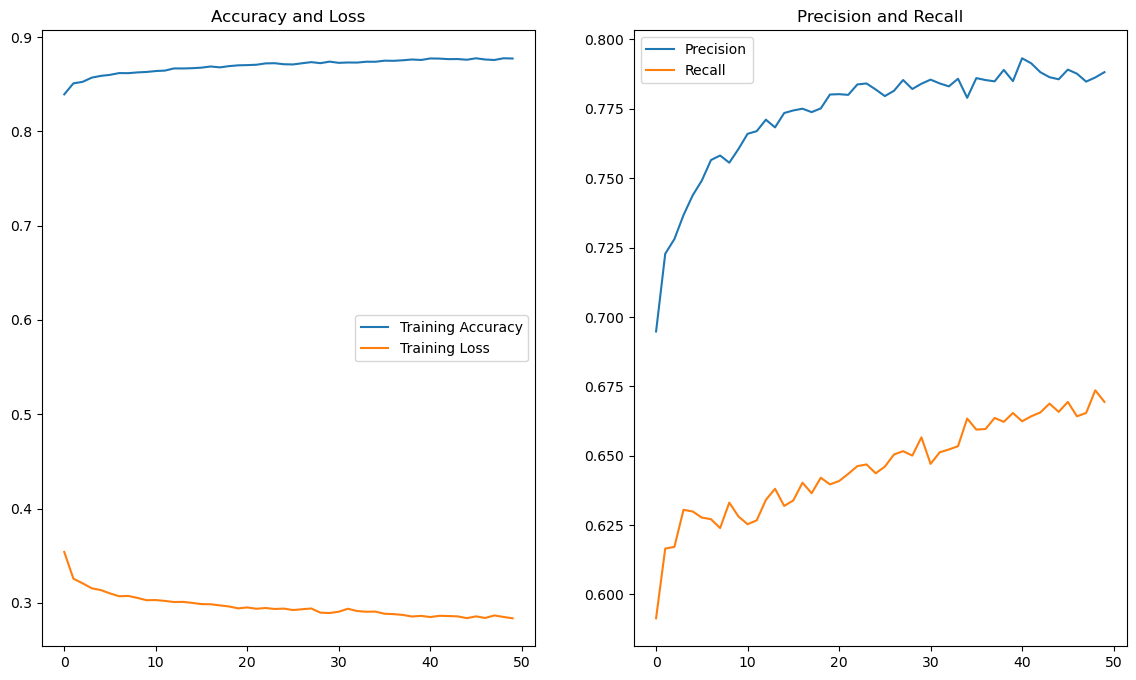

In [109]:
train_acc = training_history.history['accuracy']
train_loss = training_history.history['loss']

precision = training_history.history['precision']
recall = training_history.history['recall']

epochs_range = range(num_epochs)

plt.figure(figsize=(14, 8))

plt.subplot(1, 2, 1)

plt.plot(epochs_range, train_acc, label='Training Accuracy')
plt.plot(epochs_range, train_loss, label='Training Loss')

plt.title('Accuracy and Loss')
plt.legend()

plt.subplot(1, 2, 2)

plt.plot(epochs_range, precision, label='Precision')
plt.plot(epochs_range, recall, label='Recall')

plt.title('Precision and Recall')
plt.legend()

## Performing prediction

In [110]:
y_pred = model.predict(x_test)

204/204 [==============================] - 1s 2ms/step


In [111]:
y_pred = np.where(y_pred>=0.5, 1, y_pred)
y_pred = np.where(y_pred<0.5, 0, y_pred)

In [112]:
pred_results = pd.DataFrame({'y_test': y_test.values.flatten(),
                             'y_pred': y_pred.flatten().astype('int32') }, index = range(len(y_pred)))

In [113]:
pd.crosstab(pred_results.y_pred, pred_results.y_test)

y_test,0,1
y_pred,,
0,4572,563
1,362,1016


In [114]:
accuracy_score(y_test, y_pred)

0.857976354982343

In [115]:
precision_score(y_test, y_pred)

0.737300435413643

In [125]:
recall_score(y_test, y_pred)

0.7434452184927169


In [117]:
import os
ckpt_path = 'my_models/spine_classfication'
ckpt_dir = os.path.dirname(ckpt_path)
ckpt_callback = tf.keras.callbacks.ModelCheckpoint(filepath=ckpt_path,
                                                   save_weights_only=True,
                                                   save_freq=3,
                                                   verbose=False)
model = build_and_compile_model()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 105)]             0         
                                                                 
 dense_3 (Dense)             (None, 256)               27136     
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_4 (Dense)             (None, 128)               32896     
                                                                 
 dense_5 (Dense)             (None, 1)                 129       
                                                                 
Total params: 60161 (235.00 KB)
Trainable params: 60161 (235.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [118]:
model.fit(dataset_train, 
          epochs=num_epochs, 
          validation_data=dataset_val,
          callbacks=[ckpt_callback])

Epoch 1/50
652/652 [==============================] - 19s 27ms/step - loss: 0.3558 - accuracy: 0.8367 - precision_1: 0.6915 - recall_1: 0.5807 - val_loss: 0.3409 - val_accuracy: 0.8382 - val_precision_1: 0.6447 - val_recall_1: 0.7217
Epoch 2/50
652/652 [==============================] - 17s 26ms/step - loss: 0.3270 - accuracy: 0.8500 - precision_1: 0.7151 - recall_1: 0.6261 - val_loss: 0.3303 - val_accuracy: 0.8430 - val_precision_1: 0.6669 - val_recall_1: 0.6872
Epoch 3/50
652/652 [==============================] - 16s 24ms/step - loss: 0.3205 - accuracy: 0.8542 - precision_1: 0.7302 - recall_1: 0.6253 - val_loss: 0.3262 - val_accuracy: 0.8480 - val_precision_1: 0.6885 - val_recall_1: 0.6664
Epoch 4/50
652/652 [==============================] - 16s 25ms/step - loss: 0.3148 - accuracy: 0.8551 - precision_1: 0.7332 - recall_1: 0.6257 - val_loss: 0.3247 - val_accuracy: 0.8476 - val_precision_1: 0.6978 - val_recall_1: 0.6407
Epoch 5/50
652/652 [==============================] - 15s 24ms/s

Epoch 36/50
652/652 [==============================] - 19s 29ms/step - loss: 0.2890 - accuracy: 0.8740 - precision_1: 0.7871 - recall_1: 0.6532 - val_loss: 0.3284 - val_accuracy: 0.8543 - val_precision_1: 0.7374 - val_recall_1: 0.6079
Epoch 37/50
652/652 [==============================] - 19s 29ms/step - loss: 0.2861 - accuracy: 0.8736 - precision_1: 0.7851 - recall_1: 0.6536 - val_loss: 0.3291 - val_accuracy: 0.8536 - val_precision_1: 0.7257 - val_recall_1: 0.6239
Epoch 38/50
652/652 [==============================] - 19s 29ms/step - loss: 0.2865 - accuracy: 0.8747 - precision_1: 0.7870 - recall_1: 0.6572 - val_loss: 0.3302 - val_accuracy: 0.8520 - val_precision_1: 0.7212 - val_recall_1: 0.6223
Epoch 39/50
652/652 [==============================] - 19s 29ms/step - loss: 0.2853 - accuracy: 0.8750 - precision_1: 0.7877 - recall_1: 0.6578 - val_loss: 0.3323 - val_accuracy: 0.8526 - val_precision_1: 0.7220 - val_recall_1: 0.6247
Epoch 40/50
652/652 [==============================] - 19s 3

In [119]:
y_pred = model.predict(x_test)
y_pred = np.where(y_pred>=0.5, 1, y_pred)
y_pred = np.where(y_pred<0.5, 0, y_pred)
accuracy_score(y_test, y_pred)

204/204 [==============================] - 1s 3ms/step


0.857362198679564

In [120]:
precision_score(y_test, y_pred)

0.740029542097489

In [126]:
recall_score(y_test, y_pred)

0.7345788473717543


In [122]:
reloaded_model = build_and_compile_model()
reloaded_model.load_weights(ckpt_path)
y_pred = reloaded_model.predict(x_test)
y_pred = np.where(y_pred>=0.5, 1, y_pred)
y_pred = np.where(y_pred<0.5, 0, y_pred)
accuracy_score(y_test, y_pred)

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 105)]             0         
                                                                 
 dense_6 (Dense)             (None, 256)               27136     
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_7 (Dense)             (None, 128)               32896     
                                                                 
 dense_8 (Dense)             (None, 1)                 129       
                                                                 
Total params: 60161 (235.00 KB)
Trainable params: 60161 (235.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________

204/204 [===========

0.857976354982343

In [123]:
reloaded_model.fit(dataset_train, 
                   epochs=num_epochs, 
                   validation_data=dataset_val)

Epoch 1/50
652/652 [==============================] - 6s 6ms/step - loss: 0.2821 - accuracy: 0.8778 - precision_2: 0.7884 - recall_2: 0.6730 - val_loss: 0.3381 - val_accuracy: 0.8501 - val_precision_2: 0.7215 - val_recall_2: 0.6087
Epoch 2/50
652/652 [==============================] - 3s 5ms/step - loss: 0.2828 - accuracy: 0.8782 - precision_2: 0.7912 - recall_2: 0.6708 - val_loss: 0.3387 - val_accuracy: 0.8528 - val_precision_2: 0.7294 - val_recall_2: 0.6119
Epoch 3/50
652/652 [==============================] - 3s 5ms/step - loss: 0.2821 - accuracy: 0.8795 - precision_2: 0.7917 - recall_2: 0.6776 - val_loss: 0.3387 - val_accuracy: 0.8526 - val_precision_2: 0.7310 - val_recall_2: 0.6079
Epoch 4/50
652/652 [==============================] - 4s 6ms/step - loss: 0.2804 - accuracy: 0.8778 - precision_2: 0.7877 - recall_2: 0.6740 - val_loss: 0.3426 - val_accuracy: 0.8522 - val_precision_2: 0.7231 - val_recall_2: 0.6199
Epoch 5/50
652/652 [==============================] - 3s 5ms/step - loss

652/652 [==============================] - 4s 6ms/step - loss: 0.2721 - accuracy: 0.8832 - precision_2: 0.7989 - recall_2: 0.6877 - val_loss: 0.3579 - val_accuracy: 0.8516 - val_precision_2: 0.7158 - val_recall_2: 0.6303
Epoch 37/50
652/652 [==============================] - 3s 5ms/step - loss: 0.2750 - accuracy: 0.8817 - precision_2: 0.7931 - recall_2: 0.6879 - val_loss: 0.3563 - val_accuracy: 0.8522 - val_precision_2: 0.7219 - val_recall_2: 0.6223
Epoch 38/50
652/652 [==============================] - 4s 6ms/step - loss: 0.2761 - accuracy: 0.8824 - precision_2: 0.7959 - recall_2: 0.6875 - val_loss: 0.3541 - val_accuracy: 0.8474 - val_precision_2: 0.7073 - val_recall_2: 0.6183
Epoch 39/50
652/652 [==============================] - 4s 5ms/step - loss: 0.2709 - accuracy: 0.8838 - precision_2: 0.8004 - recall_2: 0.6891 - val_loss: 0.3561 - val_accuracy: 0.8459 - val_precision_2: 0.6996 - val_recall_2: 0.6239
Epoch 40/50
652/652 [==============================] - 4s 6ms/step - loss: 0.277

In [124]:
y_pred = reloaded_model.predict(x_test)
y_pred = np.where(y_pred>=0.5, 1, y_pred)
y_pred = np.where(y_pred<0.5, 0, y_pred)
accuracy_score(y_test, y_pred)

204/204 [==============================] - 1s 4ms/step


0.8513741747274681